In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[filename]))

Saving clean_data.csv to clean_data.csv


In [ ]:
data

,Code,Week Number,Zip,Number of reviews,Number of concerts,Arena,Concert_Yes_No
0,1:90010,1,90010,28,0,Wiltern Theatre,0
1,1:90014,1,90014,20,0,The Oasis,0
2,1:90015,1,90015,32,0,Crypto.com Arena,0
3,1:90068,1,90068,4,0,Hollywood Bowl,0
4,1:90095,1,90095,4,0,Royce Hall,0
...,...,...,...,...,...,...,...
1612,99:90095,99,90095,1,0,Royce Hall,0
1613,99:90305,99,90305,1,0,The Forum,0
1614,99:91103,99,91103,34,0,Rose Bowl,0
1615,99:91764,99,91764,6,0,Citizens Business Bank Arena,0


In [ ]:
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import f_oneway

In [ ]:
y = data["Number of reviews"]

x = data[["Concert_Yes_No"]]

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Number of reviews   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.156
Date:                Sun, 10 Dec 2023   Prob (F-statistic):             0.0758
Time:                        05:13:54   Log-Likelihood:                -7404.2
No. Observations:                1617   AIC:                         1.481e+04
Df Residuals:                    1615   BIC:                         1.482e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.6665      0.594     39.

In [ ]:
data2 = data[["Number of reviews","Number of concerts", "Zip", "Week Number"]]

data_encoded = pd.get_dummies(data2, columns=["Zip", "Week Number"])

data_encoded

,Number of reviews,Number of concerts,Zip_90010,Zip_90014,Zip_90015,Zip_90068,Zip_90095,Zip_90305,Zip_91103,Zip_91764,...,Week Number_199,Week Number_200,Week Number_201,Week Number_202,Week Number_203,Week Number_204,Week Number_205,Week Number_206,Week Number_207,Week Number_208
0,28,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,32,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1613,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1614,34,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1615,6,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = data_encoded["Number of reviews"]

x = data_encoded.drop('Number of reviews', axis=1)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Number of reviews   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     50.24
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:14:03   Log-Likelihood:                -5652.0
No. Observations:                1617   AIC:                         1.174e+04
Df Residuals:                    1400   BIC:                         1.291e+04
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.3343      0

\begin{align}
Y = \beta_0 + \beta_1\text{(# of Concert)} + \sum_{i}\alpha_i\text{Zipcode}i + \sum{j}\gamma_j\text{Week}_j
\end{align}

Saving Zipcode wise average reviews.csv to Zipcode wise average reviews.csv


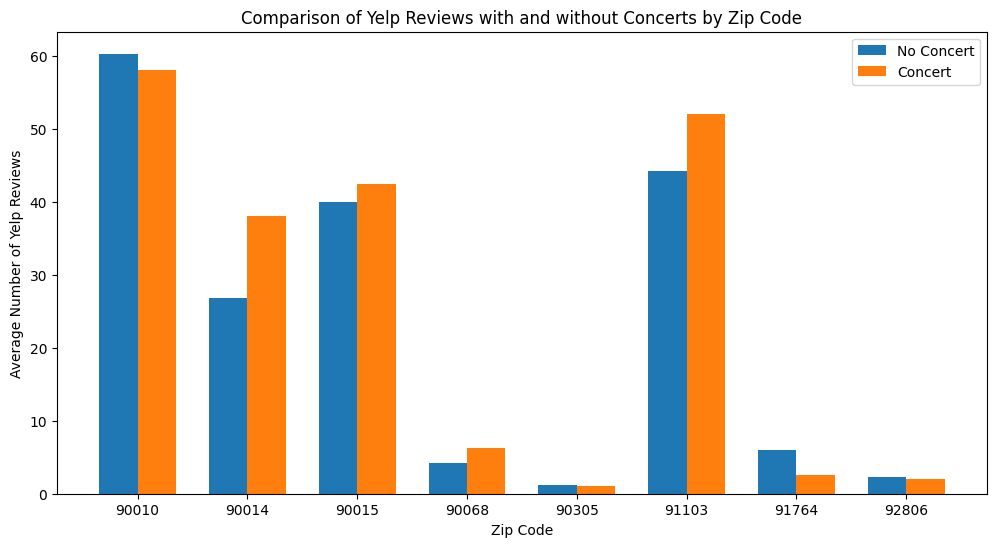

In [ ]:
uploaded = files.upload()

filename = list(uploaded.keys())[0]

data = pd.read_csv(io.BytesIO(uploaded[filename]))

zipcode = data['Zip code']

no_concert_reviews = data['No Concert']

concert_reviews = data['Concert']

plt.figure(figsize=(12, 6))

bar_width = 0.35

bar_positions1 = range(len(zipcode))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

plt.bar(bar_positions1, no_concert_reviews, width=bar_width, label='No Concert')
plt.bar(bar_positions2, concert_reviews, width=bar_width, label='Concert')

plt.xlabel('Zip Code')
plt.ylabel('Average Number of Yelp Reviews')
plt.title('Comparison of Yelp Reviews with and without Concerts by Zip Code')
plt.xticks([pos + bar_width/2 for pos in bar_positions1], zipcode)
plt.legend()
plt.show()
